In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

In [2]:
#Simulation r_a = 0:

sigma_c=1
r_c=1/57
v=1

m=np.zeros(21)
cov=np.zeros((21,21))
for s in range(21):
    cov[s,s]=(sigma_c**2)*(1-np.exp(-2*r_c*v*(s)/sigma_c))
    for t in range(s):
        cov[t,s]=cov[s,t]=(sigma_c**2)*(1-np.exp(-2*r_c*v*(t)/sigma_c))*np.exp(-r_c*v*(s-t)/sigma_c)
        

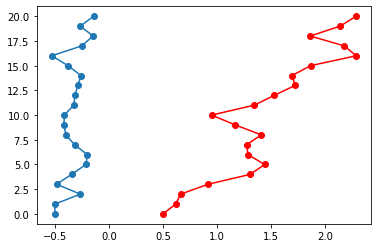

In [46]:
#Trajectory visualization


X1 = np.random.multivariate_normal(m, cov)-0.5
X2 = np.random.multivariate_normal(m, cov)+0.5

Y=np.arange(0,21)

plt.plot(X1,Y,marker="o")

plt.plot(X2,Y,'red',marker="o")

plt.show()

In [4]:
#Naive MC

d=1 #Distance between planes (parallel flights)
N=100000

m=np.zeros(20)
cov=np.zeros((20,20))
for s in range(20):
    cov[s,s]=(sigma_c**2)*(1-np.exp(-2*r_c*v*(s+1)/sigma_c))
    for t in range(s):
        cov[t,s]=cov[s,t]=(sigma_c**2)*(1-np.exp(-2*r_c*v*(t+1)/sigma_c))*np.exp(-r_c*v*(s-t)/sigma_c)
        
X = np.random.multivariate_normal(m, cov,size=N)-d/2
Y = np.random.multivariate_normal(m, cov,size=N)+d/2
Z=np.min(abs(Y-X),axis=1)<0.1
print(np.mean(Z))

0.31756


In [6]:
#utility function

def xtcx(x,C):
    return(np.apply_along_axis(lambda x:np.dot(x.T,np.dot(C,x)),0,x))

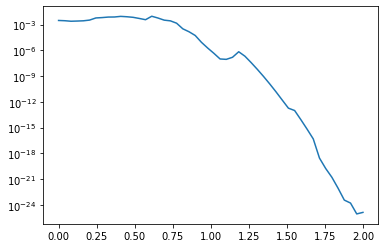

In [9]:
#Optimal mean shift

d=3
N=20000
deltas = np.linspace(0,2,50)
l=[]
mu=np.zeros(20)+d
X = np.random.multivariate_normal(mu, cov,size=N)
Y = np.random.multivariate_normal(np.zeros(20), cov,size=N)
inv_C=np.linalg.inv(cov)
for delta in deltas:
    mu_=(mu-delta).reshape(20,1)
    X_=(X-delta).T
    Y_=Y.T
    Z=np.min(abs(X_-Y_),axis=0)<0.1
    mu=mu.reshape(20,1)
    r=np.exp(-0.5*(xtcx(X_-mu,inv_C)-xtcx(X_-mu_,inv_C)))
    l.append(np.mean((Z*r)**2))

plt.plot(deltas,l)
plt.yscale('log')
plt.show()

In [59]:
#Mean shift :

d=3
N=2000000
l=[]
mu=np.zeros(20)+d
X = np.random.multivariate_normal(mu, cov,size=N)
Y = np.random.multivariate_normal(np.zeros(20), cov,size=N)
inv_C=np.linalg.inv(cov)
delta=1.75
mu_=(mu-delta).reshape(20,1)
X_=(X-delta).T
Y_=Y.T
Z=np.min(abs(X_-Y_),axis=0)<0.1
mu=mu.reshape(20,1)
r=np.exp(0.5*(-xtcx(X_-mu,inv_C)+xtcx(X_-mu_,inv_C)))
print(np.mean((Z*r))) 


2.3387127875390148e-08


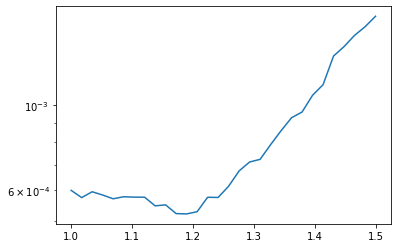

In [12]:
# Variance shift : choix of alpha 


d=3.5
N=100000
alphas = np.linspace(1,1.5,30)
l=[]
mu=np.zeros(20)+d/2
X = np.random.multivariate_normal(mu, cov,size=N)
Y = np.random.multivariate_normal(-mu, cov,size=N)

for alpha in alphas:
    mu=np.zeros(20)+d/2
    X_=(((alpha)**0.5)*X+(1-(alpha)**0.5)*d/2).T
    Y_=Y.T
    mu=mu.reshape(20,1)
    Z=np.min(abs(X_-Y_),axis=0)<0.1
    inv_C=np.linalg.inv(cov)
    r=np.exp(0.5*(xtcx(X_-mu,(1/alpha-1)*inv_C)+20*np.log(alpha)))
    l.append(np.mean((Z*r)**2))
    
plt.plot(alphas,l)
plt.yscale('log')
plt.show()

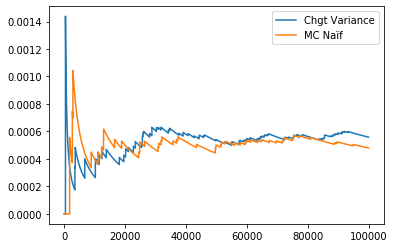

MC Naïf : 0.00048
Chgt variance : 0.000558381278926783


In [11]:
#variance shift :
N=100000
d=3.5
mu=np.zeros(20)+d/2
cov=np.zeros((20,20))
for s in range(20):
    cov[s,s]=(sigma_c**2)*(1-np.exp(-2*r_c*v*(s+1)/sigma_c))
    for t in range(s):
        cov[t,s]=cov[s,t]=(sigma_c**2)*(1-np.exp(-2*r_c*v*(t+1)/sigma_c))*np.exp(-r_c*v*(s-t)/sigma_c)


alpha=1.1

X = np.random.multivariate_normal(mu, cov,size=N)
Y = np.random.multivariate_normal(-mu, cov,size=N)

X_=(((alpha)**0.5)*X+(1-(alpha)**0.5)*d/2).T
Y_=Y.T

mu=mu.reshape(20,1)
Z=np.min(abs(X_-Y_),axis=0)<0.1
inv_C=np.linalg.inv(cov)
r=np.exp(0.5*(xtcx(X_-mu,(1/alpha-1)*inv_C)+20*np.log(alpha)))
l=np.cumsum(Z*r)/np.arange(1,N+1)
plt.plot(np.arange(1,N+1),l,label='Chgt Variance')

#Naive MC

mu=np.zeros(20)+d/2       
X = np.random.multivariate_normal(mu, cov,size=N)
Y = np.random.multivariate_normal(-mu, cov,size=N)
Y=np.min(abs(X-Y),axis=1)<0.1
vals=np.cumsum(Y)/np.arange(1,N+1)
plt.plot(np.arange(1,N+1),vals, label='MC Naïf')
plt.legend(loc='upper right')
plt.show()
print("MC Naïf :",np.mean(Y))
print("Chgt variance :", np.mean(Z*r))

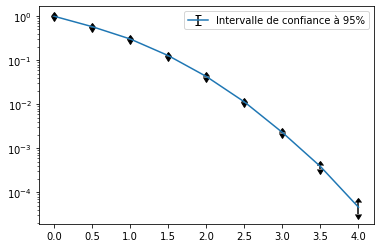

In [200]:
x=np.array([0,0.5,1,1.5,2,2.5,3,3.5,4])
y=np.array([1.0,0.579879,0.304379,0.127644,0.042899,0.01135,0.002294,0.000387,4.6e-05])
vars=np.array([0,0.24361934535899998,0.211732424359,0.111351009264,0.041058675799,0.0112211775,0.0022887375640000002,0.000386850231,4.5997884e-5])
errors=2*(vars/1000000)**0.5
#plt.plot(x,y)
plt.errorbar(x,y,yerr=errors,ecolor='black',uplims=True,lolims=True,label='Intervalle de confiance à 95%')
plt.yscale('log')
plt.legend()
plt.show()